In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
# Check for missing values
print(df.isnull().sum())

year                       0
per capita income (US$)    0
dtype: int64


In [5]:
X = df[['year']]  # Independent variable (Feature)
y = df['per capita income (US$)']  # Dependent variable (Target)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

##Model Evaluation

In [10]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3240.91399747583
Mean Squared Error (MSE): 15147815.5477862
Root Mean Squared Error (RMSE): 3892.0194690913613
R² Score: 0.8751771396846304


##Regression Line

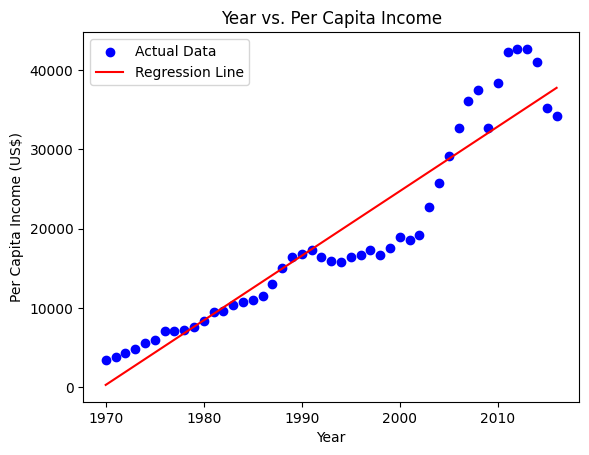

In [11]:
# Scatter plot of actual data
plt.scatter(X, y, color='blue', label="Actual Data")

# Plot regression line
plt.plot(X, model.predict(X), color='red', label="Regression Line")

plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.title("Year vs. Per Capita Income")
plt.legend()
plt.show()

##Residual Plot (Error Analysis)

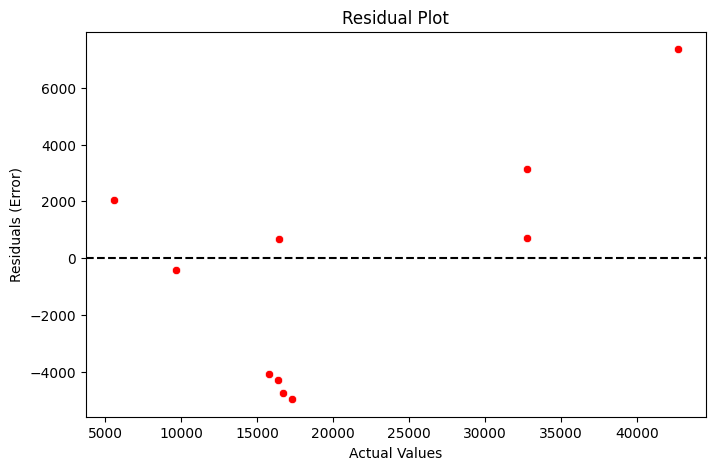

In [15]:
import seaborn as sns

residuals = y_test - y_pred  # Calculate residuals

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residuals, color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()

##Distribution of Errors

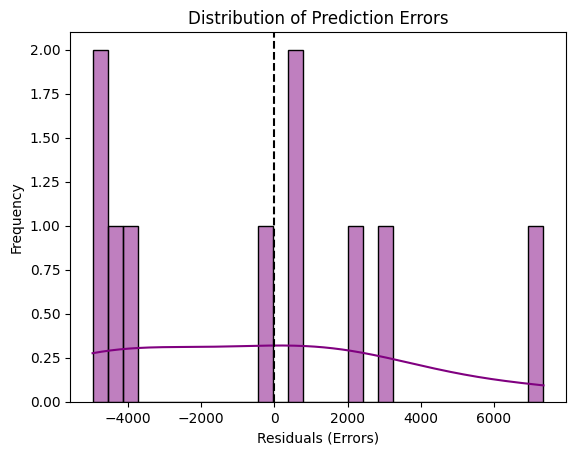

In [16]:
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.axvline(x=0, color="black", linestyle="--")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

##Scatter Plot: Actual vs. Predicted Values

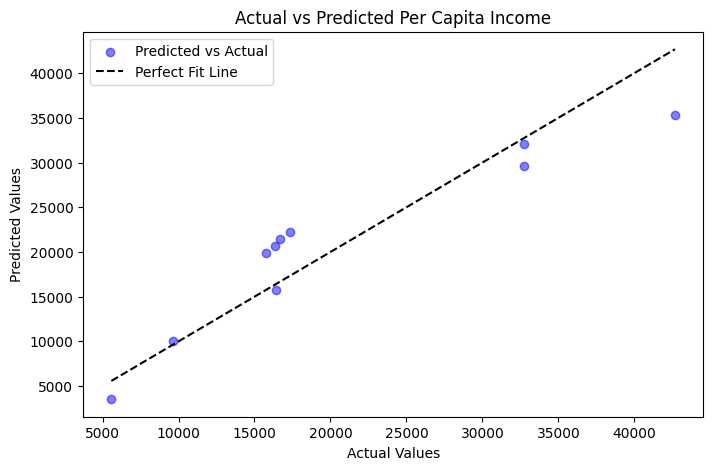

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color="black", label="Perfect Fit Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Per Capita Income")
plt.legend()
plt.show()

##Learning Curve


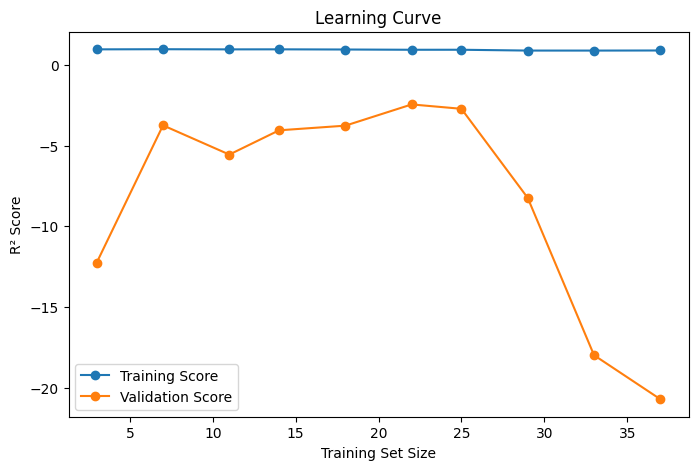

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), "o-", label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), "o-", label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve")
plt.legend()
plt.show()
